In [1]:
import pandas as pd
df = pd.read_excel('data_ab_test.xlsx').drop(columns=['ID'])
df.head(5)

,T,bus_offers_count,passenger_count,direction_conv,price_mean,price_min,price_max,price_std,final_rating_mean,final_rating_min,...,avia_pages,train,etrain,bus_pages,tours,avia_orders,bus_orders,zhd,buy,total_profit
0,0,2,1,0.000000,460.312930,460.312930,613.750573,60.104076,4.666667,4.666667,...,0,0,0,0,0,0,0,0,1,49.777153
1,0,3,1,0.070690,1830.000000,1830.000000,1830.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,103.920508
2,0,6,1,0.008299,482.400000,482.400000,482.400000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,29.624508
3,0,2,1,0.047368,985.000000,910.000000,1000.000000,36.742346,8.764257,8.167426,...,0,0,0,0,0,0,0,0,1,75.017458
4,0,6,2,0.045709,952.700624,952.700624,1270.267499,415.527487,8.882291,8.769546,...,0,0,0,0,0,0,0,0,1,27.034780


In [2]:
#баланс ковариат: таблица с результатми теста Стьюдента на равенство средних

def balance_covariate(df):
    number_of_treated=len(df.query('T==1'))
    number_of_control=len(df.query('T==0'))

    covariate_table_mean=pd.DataFrame(df.groupby(["T"], as_index=True).mean()).drop(columns=["buy", "total_profit"]).T.rename(columns={0: 'mean_control', 1: 'mean_treat'}).T
    covariate_table_var=pd.DataFrame(df.groupby(["T"], as_index=True).var()).drop(columns=["buy", "total_profit"]).T.rename(columns={0: 'var_control', 1: 'var_treat'}).T

    frames=[covariate_table_mean, covariate_table_var]
    result = pd.concat(frames).T

    t_stat=[]

    for i in range(0, len(result)):
        numerator=result['mean_control'][i]-result['mean_treat'][i]
        denominator=((result['var_control'][i]/number_of_control) + (result['var_treat'][i]/number_of_treated))**(1/2)
        t_stat.append(numerator/denominator)

    result['t_статистика']=t_stat

    p_value=[]

    for i in range(0, len(result)):
        if abs(result['t_статистика'][i]) <= 1.645 :
            p_value.append('***')
        elif abs(result['t_статистика'][i]) <= 1.96:
            p_value.append('**')
        elif abs(result['t_статистика'][i]) <= 2.58:
            p_value.append('*')
        else:
            p_value.append(' ')

    result['значимость']=p_value
    return(result.round(3))

balance_covariate(df)

T,mean_control,mean_treat,var_control,var_treat,t_статистика,значимость
bus_offers_count,10.940,11.022,335.103,325.924,-0.355,***
passenger_count,1.153,1.151,0.272,0.304,0.239,***
direction_conv,0.042,0.043,0.002,0.002,-0.996,***
price_mean,932.693,926.514,527800.242,535795.128,0.670,***
price_min,859.304,852.496,470345.265,472893.236,0.784,***
price_max,1118.505,1112.063,772938.409,789879.705,0.576,***
price_std,122.396,124.317,70129.541,95248.322,-0.528,***
final_rating_mean,6.916,6.931,10.468,10.333,-0.346,***
final_rating_min,6.406,6.422,9.656,9.554,-0.408,***
final_rating_max,7.309,7.330,11.719,11.595,-0.482,***


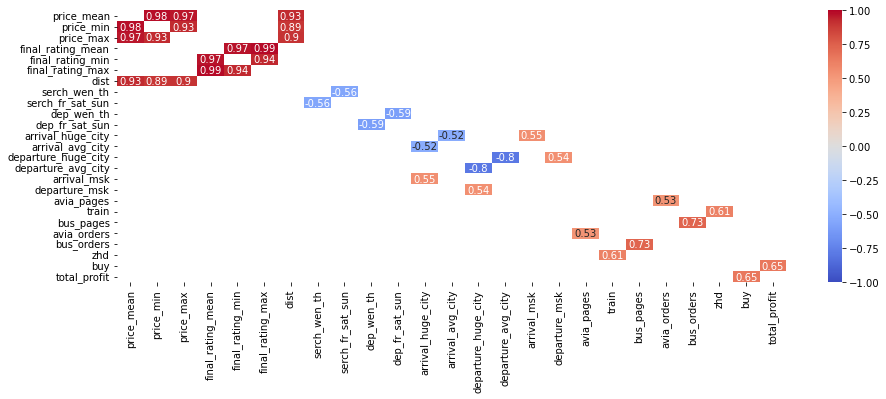

In [3]:
#корреляционная матрица

import matplotlib.pyplot as plt
import seaborn as sns

dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
for column in filteredDf.columns:
    if filteredDf[column].isna().sum() == len(filteredDf):
        filteredDf=filteredDf.drop(column, axis=1)
        filteredDf=filteredDf.drop(column)
plt.figure(figsize=(15,5))

sns.heatmap(filteredDf, annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

In [4]:
#расчет vif для выявления мультиколлениарности

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
    return(vif_data)

vif_df=vif(df)
vif_df[vif_df["VIF"]>=10]

,feature,VIF
4,price_mean,240.926509
5,price_min,102.378140
6,price_max,62.261544
8,final_rating_mean,1170.189207
9,final_rating_min,321.490550
10,final_rating_max,1128.136049
11,final_rating_std,11.978939
12,dist,21.798929


In [5]:
#VIF после того как выкинула сильно коррелирующие переменные

df_vif=df.drop(columns=['price_min', 'price_max', 'final_rating_min', 'final_rating_max'])
vif_df=vif(df_vif)
vif_df[vif_df["VIF"]>=10]

,feature,VIF
4,price_mean,22.693179
8,dist,21.139223


In [6]:
#построение логистической регресии и вывод значимых коэффициентов

import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm

def building_logistic_regression(df):
    
    def logreg_coef(logreg):
        coef=[]
        coef_list=logreg.coef_.tolist()[0]
        coef.append(*logreg.intercept_)
        for i in range(0, len(coef_list)):
            coef.append(coef_list[i])
        return(coef)
    
    def logit_p1value(model, x):
        p1 = model.predict_proba(x)
        n1 = len(p1)
        m1 = len(model.coef_[0]) + 1
        coefs = np.concatenate([model.intercept_, model.coef_[0]])
        x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
        answ = np.zeros((m1, m1))
        for i in range(n1):
            answ = answ + np.dot(np.transpose(x_full[i, :].astype(float)), x_full[i, :].astype(float)) * float(p1[i,1]) * float(p1[i, 0])
        vcov = np.linalg.inv(np.matrix(answ))
        se = np.sqrt(np.diag(vcov))
        t1 =  coefs/se  
        p1 = (1 - norm.cdf(abs(t1))) * 2
        return p1
    
    def confidence(x):
        return ('***' if x <= 0.01 else ('**' if x <= 0.05 else ('*' if x<= 0.1 else ' ')))
    
    covariates=(df.columns.drop(['total_profit', 'buy']).to_list())
    X=df[covariates]
    y=np.ravel(df['buy'])
    result_logistic_dict={'covariates': ['intercept'] + covariates}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
    methods=['l1', 'l2', 'elasticnet']
    
    conf=np.vectorize(confidence)
    
    for method in methods:
        if method== 'elasticnet':
            logreg = LogisticRegression(penalty=method, solver='saga', n_jobs=-1, multi_class='ovr', max_iter=10000, l1_ratio=0.5)
        else:
            logreg = LogisticRegression(penalty=method, solver='saga', n_jobs=-1, multi_class='ovr', max_iter=10000)
        logreg.fit(X_train, y_train)
        result_logistic_dict[method]=logreg_coef(logreg)
        result_logistic_dict[method + str('_confidence')]=conf(logit_p1value(logreg, X))

    res=pd.DataFrame(result_logistic_dict)
    return(res)
results = building_logistic_regression(df_vif)

In [7]:
results[results["l1_confidence"] != ' ']

,covariates,l1,l1_confidence,l2,l2_confidence,elasticnet,elasticnet_confidence
2,bus_offers_count,-0.008189,***,-0.008182,***,-0.008185,***
3,passenger_count,-0.114617,***,-0.114722,***,-0.114677,***
5,price_mean,-0.000815,***,-0.000815,***,-0.000815,***
6,price_std,0.000320,***,0.000320,***,0.000320,***
7,final_rating_mean,-0.065939,***,-0.065916,***,-0.065926,***
9,dist,0.000784,***,0.000784,***,0.000784,***
10,depth,-0.004520,***,-0.004520,***,-0.004520,***
27,train,-0.001854,**,-0.001858,**,-0.001856,**
29,bus_pages,0.026751,***,0.026748,***,0.026750,***
33,zhd,0.036857,**,0.036990,**,0.036924,**


In [8]:
#вывод всех коэффициентов логистической регресии (значимых и незначимых)

results

,covariates,l1,l1_confidence,l2,l2_confidence,elasticnet,elasticnet_confidence
0,intercept,-0.126230,,-0.126173,,-0.126209,
1,T,-0.051942,,-0.052084,,-0.052015,
2,bus_offers_count,-0.008189,***,-0.008182,***,-0.008185,***
3,passenger_count,-0.114617,***,-0.114722,***,-0.114677,***
4,direction_conv,0.007290,,0.007472,,0.007381,
5,price_mean,-0.000815,***,-0.000815,***,-0.000815,***
6,price_std,0.000320,***,0.000320,***,0.000320,***
7,final_rating_mean,-0.065939,***,-0.065916,***,-0.065926,***
8,final_rating_std,0.005545,,0.005628,,0.005586,
9,dist,0.000784,***,0.000784,***,0.000784,***


In [9]:
#функция построения причинного случайного леса

from econml.dml import CausalForestDML
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

def CATE(df, y, X, model_t, model_y):
    X=df[X]
    Y=np.ravel(df[y])
    T = df['T']
    W=None

    causal_forest_buy = CausalForestDML(model_t= model_t,
                    model_y= model_y,
                    criterion='het', n_estimators=100,       
                    min_samples_leaf=30, 
                    max_depth=5, max_samples=0.5,
                    discrete_treatment=True, cv=12, min_samples_split=50, random_state=23)                      
    causal_forest_buy.fit(Y, T, X=X, W=W) 
    return(causal_forest_buy)

CATE_buy=CATE(df, 'buy' ,df.columns.drop(['total_profit', 'buy', 'T']).to_list(),
             model_t= LogisticRegressionCV(solver='sag', max_iter=1000, tol=0.01, multi_class='ovr', random_state=23),
             model_y= LogisticRegressionCV(solver='sag', max_iter=1000, tol=0.01, multi_class='ovr', random_state=23))

In [10]:
#средний эффект воздействия для модели с зависимой переменной "buy"

CATE_buy.const_marginal_ate_inference(df[df.columns.drop(['total_profit', 'buy', 'T']).to_list()])

 99%|===================| 24742/25000 [00:51<00:00]        

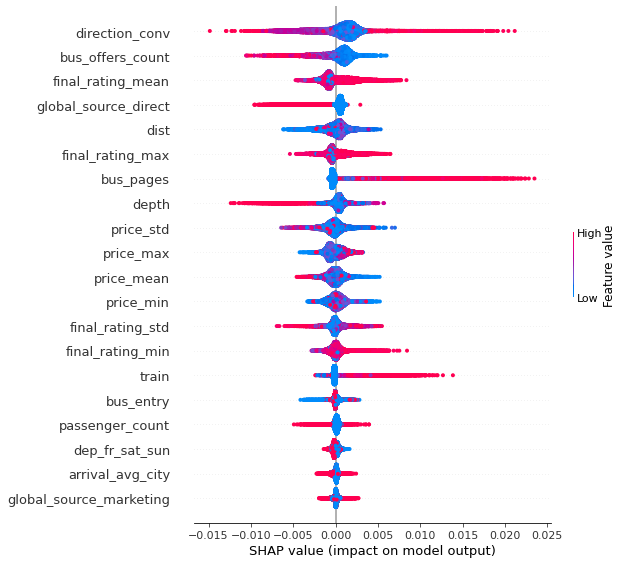

In [11]:
#гетерогенный эффект воздействия для модели с зависимой переменной "buy" в зависимости от разброса характеристик

import shap

shap_values = CATE_buy.shap_values(df[df.columns.drop(['total_profit', 'buy', 'T']).to_list()])
shap.summary_plot(shap_values['Y0']['T_1'])

In [12]:
#ограничиваю датасет - датасет с прибылью больше 0
#и проверяю на новом датасете соблюдается ли баланс ковариат

df_not_null_profit=df[df['total_profit'] > 0]
balance_covariate(df_not_null_profit)

T,mean_control,mean_treat,var_control,var_treat,t_статистика,значимость
bus_offers_count,12.466,12.198,273.179,279.844,0.550,***
passenger_count,1.183,1.153,0.297,0.266,1.925,**
direction_conv,0.067,0.069,0.004,0.004,-0.896,***
price_mean,890.873,884.419,447307.578,432330.509,0.332,***
price_min,808.261,803.407,380760.271,368237.654,0.270,***
price_max,1090.300,1079.252,709646.644,673092.226,0.453,***
price_std,132.771,127.650,75875.321,107277.407,0.578,***
final_rating_mean,7.507,7.527,6.909,6.913,-0.263,***
final_rating_min,6.902,6.960,6.557,6.553,-0.773,***
final_rating_max,7.972,7.985,7.817,7.820,-0.159,***


In [14]:
#строю CUPED оценку для "total_profit", беру ковариаты, которые не меняются во времени: 
#avia_pages + train + etrain + bus_pages + tours + avia_orders + bus_orders + zhd

import statsmodels.formula.api as smf
import numpy as np

X_pred='avia_pages + train + etrain + bus_pages + tours + avia_orders + bus_orders + zhd'
df_not_null_profit['total_profit_tilde']=smf.ols('total_profit ~' + str(X_pred), data=df_not_null_profit).fit(cov_type="HC3").resid + np.mean(df['total_profit'])
smf.ols('total_profit_tilde ~ T', data=df_not_null_profit).fit(cov_type="HC3").summary().tables[1]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,11.1427,1.549,7.194,0.000,8.107,14.178
T,5.5468,2.307,2.405,0.016,1.026,10.068


In [15]:
#обучаю модель причинного случайного леса для зависимой переменной "total_profit"

CATE_total_profit=CATE(df_not_null_profit, 
                       'total_profit', 
                       df_not_null_profit.columns.drop(['total_profit', 'buy', 'T', 'total_profit_tilde']).to_list(),
                       model_t=LogisticRegressionCV(solver='saga', max_iter=2000, tol=0.001, multi_class='ovr', random_state=22), 
                       model_y='auto')

In [16]:
#средний эффект воздействия для модели с зависимой переменной "total_profit"

CATE_total_profit.const_marginal_ate_inference(df_not_null_profit[df_not_null_profit.columns.drop(['total_profit', 'buy', 'T', 'total_profit_tilde']).to_list()])

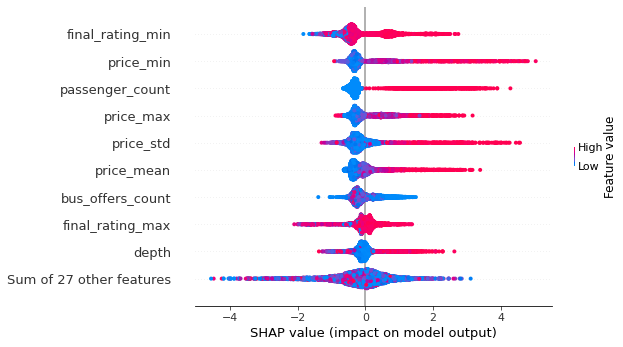

In [17]:
#гетерогенный эффект воздействия для модели с зависимой переменной "total_profit" 
#в зависимости от разброса характеристик

shap_values = CATE_total_profit.shap_values(df_not_null_profit[df_not_null_profit.columns.drop(['total_profit', 'buy', 'T', 'total_profit_tilde']).to_list()])
shap.plots.beeswarm(shap_values['Y0']['T_1'])